In [ ]:
#Schedule funtion to schedule task based on current time  't'
#Function input
#L: List of n tasks,
#Lp: Is the in progress task
#F: Boolean variable of taks processor free value True/false.

def schedule_tasks(L, Lp, F, t):
    global Fp # global variable to track free positions
    j = 0
    while j < len(L) and Fp > 0: #Schedule task main loop when j is less then of the length of all task list and there is a free position track by Fp
        if not Lp[j] and all(F[p] for p in L[j]['fixj']):
            L[j]['start'] = t # if task is eligible start the task
            Lp[j] = True # Change the task inprogress status to True
            for p in L[j]['fixj']:
                F[p] = False
            Fp -= len(L[j]['fixj']) #redecued the free count position
            j = 0  #Reset the index to adjust the scenario when some task can run parallel based on free processors
            continue
        j += 1 #continue to processor allocation
    return t, j # Return current time and last indices of the task.

#Advance time function
#Lp: Is the in progress task
#F: Boolean variable of taks processor free value True/false.

def advance_time(Lp, F, t):
    global Fp
    j = 0
    jmin = -1
    tmin = float('inf')
    while j < len(Lp):
      #Update jmin value when task is progress and store the task completion time in tmin that is equal to the start time and processing time of completing the task
        if Lp[j] and (L[j]['start'] + L[j]['p']) > t and (L[j]['start'] + L[j]['p']) < tmin:
            jmin = j
            tmin = L[j]['start'] + L[j]['p']
        j += 1
        #Remove the task from the list of in progress task
    if jmin != -1:
        for p in L[jmin]['fixj']:
            F[p] = True
        Fp += len(L[jmin]['fixj'])
    return tmin #return the time of task finishes.

#Multiprocessor scheduling using longest first criteria from the list of tasks
def SA_LF(L, m):
    global Fp
    L.sort(key=lambda x: -x['p']) #sorting the task list according to longest first criteria means high processing time will process first
    Lp = [False for _ in L]
    t = 0
    Fp = m #List of processor
    Counter = 0
    F = [True for _ in range(m)] #Free position of all processor's. Initially all processor are free.
    while Counter < len(L):
        t, _ = schedule_tasks(L, Lp, F, t) #calling schedule task functuon
        if Counter == sum(Lp):
            t = advance_time(Lp, F, t) #calling avdance timing function
        Counter = sum(Lp)
    return [{'name': task['name'], 'start_time': task.get('start', -1)} for task in L]

#Multiprocessor scheduling using widest first criteria from the list of tasks
def SA_WF(L, m):
    global Fp
    L.sort(key=lambda x: -len(x['fixj']))#sorting the task list according to widest first criteria means the task require more processor will start first.
    Lp = [False for _ in L]
    t = 0
    Fp = m
    Counter = 0
    F = [True for _ in range(m)]
    while Counter < len(L):
        t, _ = schedule_tasks(L, Lp, F, t)#calling schedule task functuon
        t = advance_time(Lp, F, t)
        Counter = sum(Lp)
    return [{'name': task['name'], 'start_time': task.get('start', -1)} for task in L]

#dummy list of tasks to check algorithm is assigning the task w.r.t the processors.
L = [
    {'name': 'A', 'p': 8, 'fixj': [0,1], 'start': -1},
    {'name': 'B', 'p': 5, 'fixj': [1,2,3], 'start': -1},
    {'name': 'C', 'p': 7, 'fixj': [2], 'start': -1},
    {'name': 'D', 'p': 6, 'fixj': [0], 'start': -1}
]

m = 4  #number of processor require to complete the task

LF_schedule = SA_LF(L, m)
WF_schedule = SA_WF(L, m)


print("LF Schedule:")
for task in LF_schedule:
    print(f"Task {task['name']} starts at time {task['start_time']}")


print("\nWF Schedule:")
for task in WF_schedule:
    print(f"Task {task['name']} starts at time {task['start_time']}")

LF Schedule:
Task A starts at time 0
Task C starts at time 0
Task D starts at time 8
Task B starts at time 8

WF Schedule:
Task B starts at time 0
Task A starts at time 6
Task C starts at time 5
Task D starts at time 0


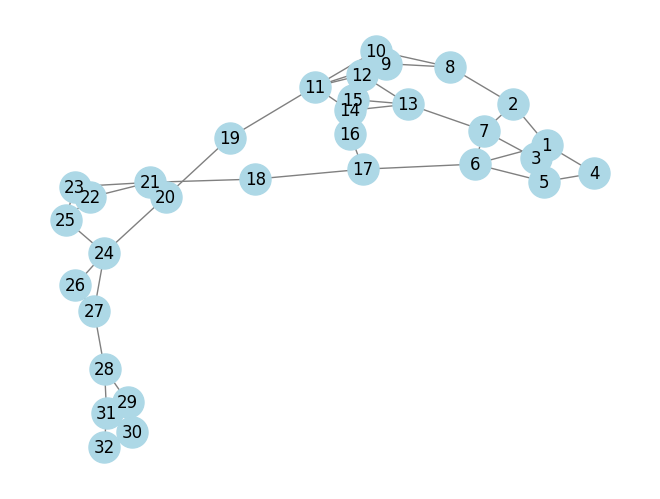

In [ ]:
#refer to the original paper a 32 node 108 link topology created using python networkx library

import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
nodes = list(range(1, 32))
G.add_nodes_from(nodes)
edges = [
(1, 2), (1, 3), (1, 4), (1, 6), (2, 7), (2, 8),
(3, 5), (3, 7), (4, 5), (5, 6), (6, 7), (6, 17),
(7, 13), (8, 9), (8, 10), (9, 11), (9, 12), (10, 11),
(11, 12), (11, 14), (11, 19), (12, 13), (13, 14),
(13, 15), (14, 15), (14, 16), (15, 16), (16, 17),
(17, 18), (18, 21), (19, 20), (20, 21), (20, 24),
(21, 22), (21, 23), (22, 23), (22, 25), (23, 25),
(24, 25), (24, 26), (24, 27), (26, 27), (27, 28),
(28, 29), (28, 31), (29, 30), (29, 31), (30, 31),
(30, 32), (31, 32)
]
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color="lightblue", edge_color="gray")
plt.show()


In [ ]:
#Shortest path node and link identification between source node and destination node using python default shortest path function.
shortest_path = nx.shortest_path(G, source=10, target=26)
print("Shortest path between node 10 and 26:", shortest_path)

Shortest path between node 10 and 26: [10, 11, 19, 20, 24, 26]


In [ ]:
L = [
{'name': 'T1','p': 3, 'fixj': [1,2,3,4,5], 'start': -1},
{'name': 'T2','p': 2, 'fixj': [1,2,3], 'start': -1},
{'name': 'T3','p': 1, 'fixj': [1,2,3,4,5], 'start': -1},
{'name': 'T4','p': 2, 'fixj': [2,3,4], 'start': -1},
{'name': 'T5','p': 4, 'fixj': [3,4,5], 'start': -1},
{'name': 'T6','p': 3, 'fixj': [1,2], 'start': -1}

]
m=6
LF_schedule = SA_LF(L, m)
WF_schedule = SA_WF(L, m)
print("LF Schedule:")
for task in LF_schedule:
    print(f"Task {task['name']} starts at time {task['start_time']}")


print("\nWF Schedule:")
for task in WF_schedule:
    print(f"Task {task['name']} starts at time {task['start_time']}")

LF Schedule:
Task T5 starts at time 0
Task T1 starts at time 4
Task T6 starts at time 0
Task T2 starts at time 7
Task T4 starts at time 9
Task T3 starts at time 11

WF Schedule:
Task T1 starts at time 0
Task T3 starts at time 3
Task T5 starts at time 4
Task T2 starts at time 8
Task T4 starts at time 10
Task T6 starts at time 4
